<a href="https://colab.research.google.com/github/FullStuckDevelooper/KNN/blob/main/datakelulusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libary Yang di Butuhkan





In [78]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import numpy as np
import pydotplus
import matplotlib.pyplot as plt
df = pd.read_excel("datakelulusanmahasiswa.xls")

# Cek Info Dari Dataset

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             379 non-null    float64
 13  IPK               379 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


 >Membersihkan Data yang tidak dibutuhkan 

---



In [80]:
df.drop(['NAMA'] , axis=1, inplace=True)

>Cek Apakah Ada Data Kosong


---

In [81]:
df.isnull().sum()

JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

>Merubah String Menjadi Int agar bisa di lakukan pemrosesan Data

---

In [82]:
jk_mapping_values = {"LAKI - LAKI": 1, "PEREMPUAN": 0 }
df.replace({"JENIS KELAMIN":jk_mapping_values}, inplace=True)

status_mapping_values = {"BEKERJA":1, "MAHASISWA": 0}
df.replace({"STATUS MAHASISWA":status_mapping_values}, inplace=True)


menikah_mapping_values = {"MENIKAH":1, "BELUM MENIKAH": 0}
df.replace({"STATUS NIKAH":menikah_mapping_values}, inplace=True)


kelulusan_mapping_values = {"TEPAT":1, "TERLAMBAT": 0}
df.replace({"STATUS KELULUSAN":kelulusan_mapping_values}, inplace=True)


>Pengelompokan Data Umur 

---

In [83]:
df.loc[df['UMUR'] <= 25, 'UMUR'] = 0
df.loc[(df['UMUR'] > 25) & (df['UMUR'] <= 30), 'UMUR'] = 1
df.loc[df['UMUR'] > 30, 'UMUR'] = 2



>Cek Data Yang akan dilakukan Pemodelan

---

In [84]:
df.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,1,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,0
1,0,0,2,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,0
2,0,1,1,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,0
3,0,0,1,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,0
4,0,1,1,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,0


>Pembuatan Variable X sebagai Feature Data 

---

In [85]:
x = df.drop("STATUS KELULUSAN", axis=1)

>Pembuatan Variable Y sebagai Label Data  yaitu "STATUS KELULUSAN"

---

In [86]:
y = df["STATUS KELULUSAN"]

Split Data Training dan Test


In [87]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 92.63%


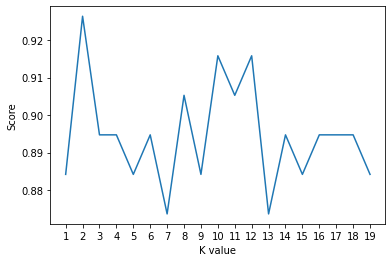

Maximum KNN Score is 92.63%


In [89]:
scoreList = []
accuracies = {}
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))